# EDA - 1.0

## Imports

In [1]:
import pandas as pd
import numpy as np
from Utils import *

## Data Loading

In [2]:
data_folder = '..\\data\\raw\\'
series = "train_series.parquet"
events = "train_events.csv"

train_series = pd.read_parquet(data_folder+series)
train_events = pd.read_csv(data_folder+events)

In [3]:
train_series = train_series[:100000]

## Data Processing

### Duplicate/Null Values

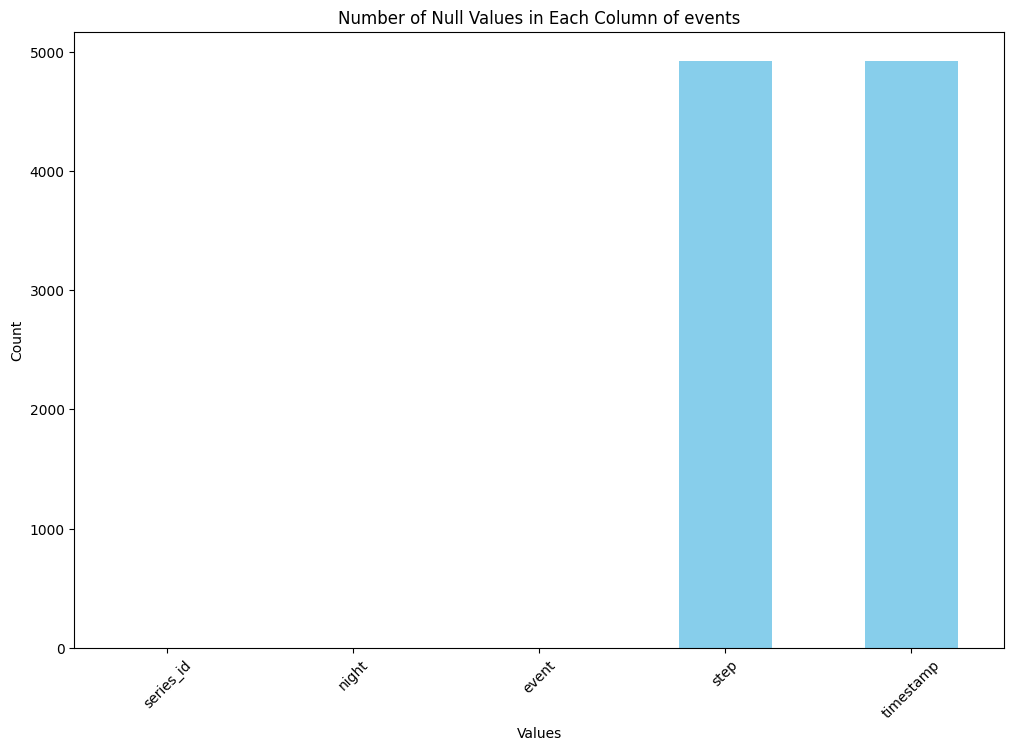

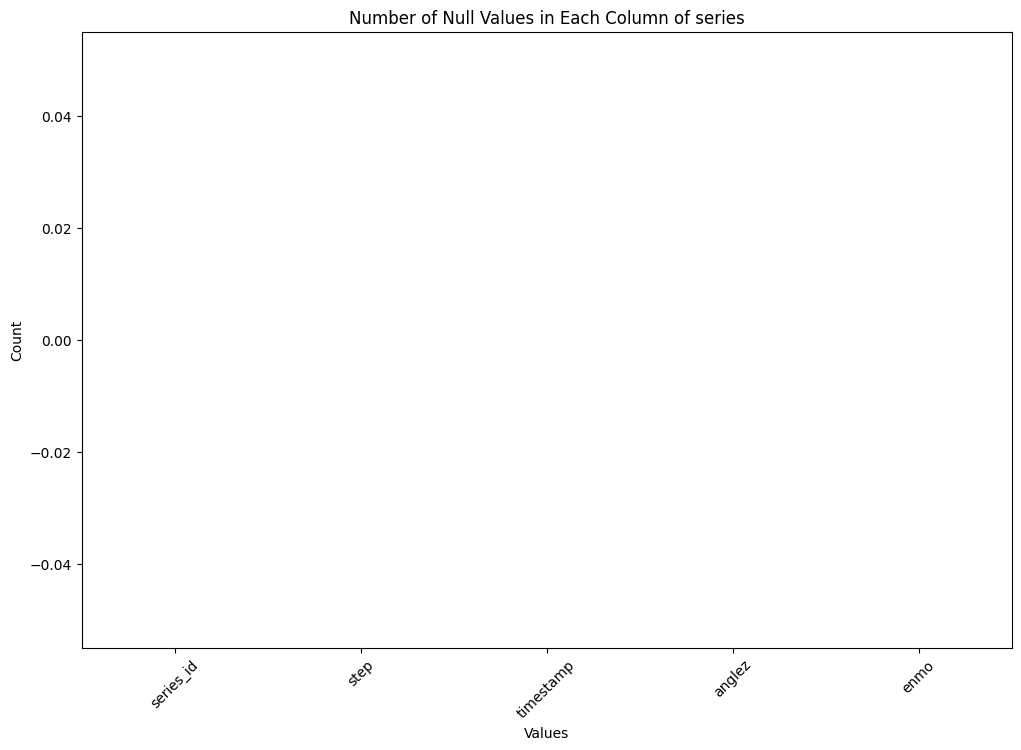

In [4]:
null_values = train_events.isnull()
null_counts = null_values.sum()
Title = "Number of Null Values in Each Column of events"
plot(null_counts,"bar",Title)

null_values = train_series.isnull()
null_counts = null_values.sum()
Title = "Number of Null Values in Each Column of series"
plot(null_counts,"bar",Title)

### Additional Features

In [4]:
def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    df['date'] = df['timestamp'].str.split('T', expand=True)[0]
    df['time'] = df['timestamp'].str.split('T', expand=True)[1].str.split('-', expand=True)[0]
    df['timestamp'] = pd.to_datetime(df['date']+' '+df['time'])
    df['hour'] = df['timestamp'].dt.hour
    return df

In [5]:
train_series = clean_df(train_series)
train_events = clean_df(train_events)

In [15]:
print(train_events.memory_usage(deep=True).sum() / (1024 * 1024))
print(train_events.memory_usage(deep=True))
print('--------------------------')
print(train_events.dtypes)

3.769380569458008
Index            132
series_id    1001052
night         116064
event         906750
step          116064
timestamp     116064
date          799731
time          780561
hour          116064
dtype: int64
--------------------------
series_id            object
night                 int64
event                object
step                float64
timestamp    datetime64[ns]
date                 object
time                 object
hour                float64
dtype: object


In [23]:
list(new_train_events.series_id.unique()).index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [26]:
type(train_id_map.id_map)

pandas.core.series.Series

In [34]:
new_train_events = train_events.copy()

# train_id_map = pd.DataFrame({
#     "series_id": new_train_events.series_id.unique(),
#     "id_map": list(new_train_events.series_id.unique()).index
# })
# # train_id_map.id_map = train_id_map.id_map.astype(np.uint16)
# train_id_map.to_parquet("../data/train_id_map.parquet", index=False)

new_train_events.night = new_train_events.night.astype(np.uint16)
new_train_events.event = new_train_events.event.replace({'onset':'0', 'wakeup':'1'}).astype(np.uint8)
# new_train_events.step = new_train_events.step.astype(np.uint32)

In [35]:
print(train_events.memory_usage(deep=True).sum() / (1024 * 1024))
print(train_events.memory_usage(deep=True))
print('--------------------------')
print(train_events.dtypes)

3.769380569458008
Index            132
series_id    1001052
night         116064
event         906750
step          116064
timestamp     116064
date          799731
time          780561
hour          116064
dtype: int64
--------------------------
series_id            object
night                 int64
event                object
step                float64
timestamp    datetime64[ns]
date                 object
time                 object
hour                float64
dtype: object


In [36]:
print(new_train_events.memory_usage(deep=True).sum() / (1024 * 1024))
print(new_train_events.memory_usage(deep=True))
print('--------------------------')
print(new_train_events.dtypes)

2.8354568481445312
Index            132
series_id    1001052
night          29016
event          14508
step          116064
timestamp     116064
date          799731
time          780561
hour          116064
dtype: int64
--------------------------
series_id            object
night                uint16
event                 uint8
step                float64
timestamp    datetime64[ns]
date                 object
time                 object
hour                float64
dtype: object


In [5]:
train_series["date"] = train_series["timestamp"].apply(lambda x: x[:10])
train_series["hour"] = train_series["timestamp"].apply(lambda x: x[11:16])


cleaned_train = train_events.dropna(subset=['timestamp']).copy()


cleaned_train["date"] = cleaned_train["timestamp"].apply(lambda x: x[:10])
cleaned_train["star_hr"] = cleaned_train["timestamp"].apply(lambda x: x[11:16])
cleaned_train["end_hr"] = cleaned_train["timestamp"].apply(lambda x: x[20:])
cleaned_train["end_hr"] = cleaned_train["end_hr"].apply(lambda x: x[:2] + ':' + x[2:])



num_days = len(train_series.date.unique())
print(f"There are {num_days} days of data in the dataset")

cleaned_train

There are 7 days of data in the dataset


,series_id,night,event,step,timestamp,date,star_hr,end_hr
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,2018-08-14,22:26,04:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,2018-08-15,06:41,04:00
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,2018-08-15,19:37,04:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,2018-08-16,05:41,04:00
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,2018-08-16,23:03,04:00
...,...,...,...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05T09:26:00-0400,2017-09-05,09:26,04:00
14502,fe90110788d2,33,onset,556560.0,2017-09-05T22:30:00-0400,2017-09-05,22:30,04:00
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400,2017-09-06,04:07,04:00
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400,2017-09-06,23:35,04:00


In [6]:
cleaned_train = cleaned_train.sort_values(by='night')
cleaned_train = cleaned_train.reset_index(drop=True)

In [7]:
len(cleaned_train.date.unique())

700

In [8]:
onset_data = cleaned_train[cleaned_train.event == "onset"]
wakeup_data = cleaned_train[cleaned_train.event == "wakeup"]
onset_data = onset_data.reset_index()
wakeup_data = wakeup_data.reset_index()

In [9]:
onset_data['date'] = pd.to_datetime(onset_data['date']).copy()
onset_data['star_hr'] = pd.to_datetime(onset_data['star_hr']).dt.time
onset_data['end_hr'] = pd.to_datetime(onset_data['end_hr']).dt.time


train_series['timestamp'] = pd.to_datetime(train_series['timestamp']).dt.time
train_series['date'] = pd.to_datetime(train_series['date']).dt.time

train_series['hour'] = pd.to_datetime(train_series['hour']).dt.time

In [15]:
onset = []
for idx,date in enumerate(onset_data.date):
    start = onset_data.star_hr[idx]
    end = onset_data.end_hr[idx]
    series_id = onset_data.series_id[idx]
    extracted_subset = train_series[
        (train_series['series_id'] == series_id) &
        (train_series['hour'] >= start) &    # Start hour condition
        (train_series['hour'] <= end)       # End hour condition
    ]
    onset.append(extracted_subset)